<a href="https://colab.research.google.com/github/shirinlatifi/pe-project/blob/master/OilVisco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#load dataset
# X: Input features
# y: Target values

df = pd.read_excel('oil visco2.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       488 non-null    float64
 1   P       495 non-null    float64
 2   Visco   495 non-null    float64
dtypes: float64(3)
memory usage: 11.7 KB


In [4]:
df.head()

,T,P,Visco
0,266.0,14.7,0.100
1,325.0,54.0,0.100
2,325.0,54.0,0.200
3,212.0,19.0,0.200
4,258.0,30.0,0.289


In [5]:
df['T'] = df['T'].fillna(df['T'].mean())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       495 non-null    float64
 1   P       495 non-null    float64
 2   Visco   495 non-null    float64
dtypes: float64(3)
memory usage: 11.7 KB


In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Visco', axis=1), df['Visco'], test_size=0.2, random_state=42)

In [8]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train.shape

(396, 2)

In [10]:
y_train.shape

(396,)

In [11]:
X_train.shape[0] , X_train.shape[1]

(396, 2)

In [12]:
# Build the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')  # Single output neuron for regression
])

In [13]:
# Compile the model
model.compile(loss='mean_squared_error')

In [14]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 15ms/step - loss: 14.6569 - val_loss: 18628.6328
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 14.0390 - val_loss: 18620.1445
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 13.4415 - val_loss: 18612.9688
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 12.9026 - val_loss: 18605.6992
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 12.3600 - val_loss: 18598.3574
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 11.8316 - val_loss: 18591.0039
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 11.3209 - val_loss: 18583.8379
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 10.8186 - val_loss: 18576.3242
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 10.3375 - val_loss: 18569.2090
Epoch 10/100
10/10 [==============================] - 0s 4ms/st

In [15]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", loss)

4/4 - 0s - loss: 10803.5527 - 17ms/epoch - 4ms/step
Test loss: 10803.552734375


In [16]:
# Make predictions
predictions = model.predict(X_test, verbose=2)

4/4 - 0s - 62ms/epoch - 15ms/step


In [17]:
# acc
from sklearn.metrics import mean_absolute_error , mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

10803.552810594663

In [18]:
mae = mean_absolute_error(y_test, predictions)
mae

17.671011599857973

In [19]:
rmse = mean_squared_error(y_test, predictions, squared =False)
rmse

103.94014051652357

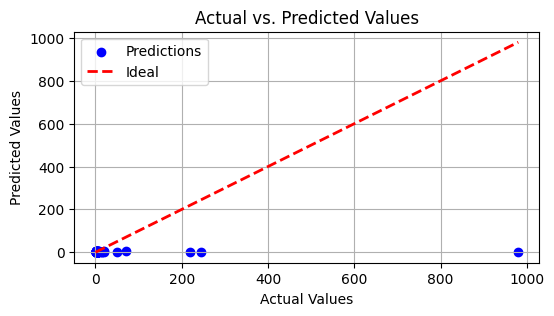

In [20]:
# visualization
import numpy as np
import matplotlib.pyplot as plt

# Plotting the actual test data and predictions
plt.figure(figsize=(6,3))
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
!pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.2 MB/s eta 0:00:00


16/16 [==============================] - 0s 2ms/step
Generation = 1
16/16 [==============================] - 0s 2ms/step
Fitness    = 0.1099802939735618
16/16 [==============================] - 0s 1ms/step
Generation = 2
16/16 [==============================] - 0s 1ms/step
Fitness    = 0.1099802939735618
16/16 [==============================] - 0s 1ms/step
Generation = 3
16/16 [==============================] - 0s 971us/step
Fitness    = 0.1099802939735618
16/16 [==============================] - 0s 1ms/step
Generation = 4
16/16 [==============================] - 0s 938us/step
Fitness    = 0.1099802939735618
16/16 [==============================] - 0s 1ms/step
Generation = 5
16/16 [==============================] - 0s 948us/step
Fitness    = 0.1099802939735618
16/16 [==============================] - 0s 1ms/step
Generation = 6
16/16 [==============================] - 0s 1ms/step
Fitness    = 0.11015171034770711
16/16 [==============================] - 0s 1ms/step
Generation = 7
16/16 [

/usr/local/lib/python3.10/dist-packages/pygad/visualize/plot.py:21: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


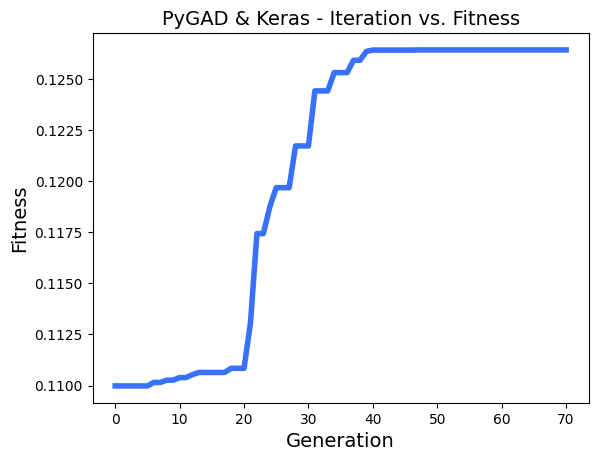

16/16 [==============================] - 0s 986us/step
Fitness value of the best solution = 0.12643352375472566
Index of the best solution : 0
16/16 [==============================] - 0s 1ms/step
Predictions : 
 [[2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281917]
 [2.1281

In [25]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad


def fitness_func(instance,solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    abs_error = mae(data_outputs, predictions).numpy() + 0.0000001
    solution_fitness = 1.0 / abs_error

    return solution_fitness


def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

input_layer  = tensorflow.keras.layers.Input(2)
dense_layer1 = tensorflow.keras.layers.Dense(10, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="relu")(dense_layer1)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

weights_vector = pygad.kerasga.model_weights_as_vector(model=model)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs = numpy.array(df[['P','T']])


# Data outputs
data_outputs = numpy.array(df['Visco'])


num_generations = 70
num_parents_mating = 5
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions2 = model.predict(df[['T','P']])
print("Predictions : \n", predictions2)

mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions2).numpy()
print("Absolute Error : ", abs_error)